In [7]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from fiberamp.fiber.microstruct.bragg import plotlogf, plotlogf_real
from scipy.optimize import newton
from IPython.display import Video


In [9]:
A = SlabExact(ns=[1,2,1], symmetric=True)

## Guided

In [3]:
field_type = 'TM'
mode_type = 'guided'
Z_plane=True

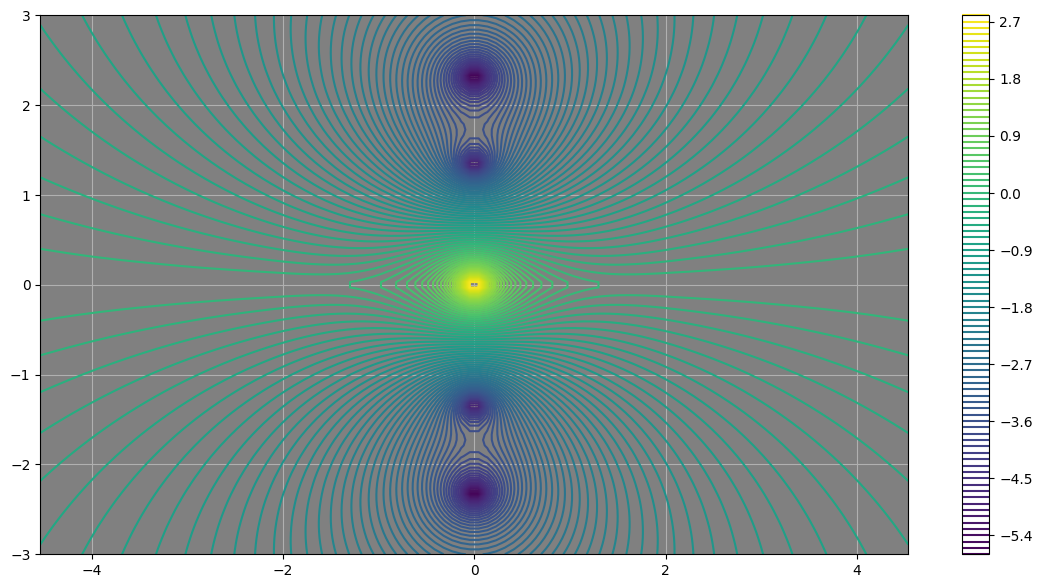

In [4]:
plotlogf(A.determinant, -A.K_low, A.K_low, -3, 3, field_type, mode_type, None, Z_plane, iref=100, rref=100,levels=100)

In [5]:
Z1 = newton(A.determinant, np.array(2.5j), args=(field_type, mode_type, None, Z_plane))
Z2 = newton(A.determinant, np.array(1.5j), args=(field_type, mode_type, None, Z_plane))
Z1, Z2

((4.504052784787989e-18+2.3201189918246534j),
 (-1.0184271402863618e-16+1.3394649815285338j))

In [6]:
B1, B2 = A.Beta_from_Z(Z1), A.Beta_from_Z(Z2)
B1, B2

((5.096576273716204-2.0503839921045046e-18j),
 (4.731416702671911+2.883169199367859e-17j))

In [7]:
F1 = A.fields(Z1, field_type=field_type, Z_plane=Z_plane)  
F2 = A.fields(Z2, field_type=field_type, Z_plane=Z_plane)  

# but this doesn't, not yet sure why (it does now, but saving below comment)
# Ah, it was because I wasn't passing it the field type, and we happen to be working TM instead of default TE
# It seems like it would be a good idea to make sure this kind of thing can't happen, maybe require field type
# as an argument.

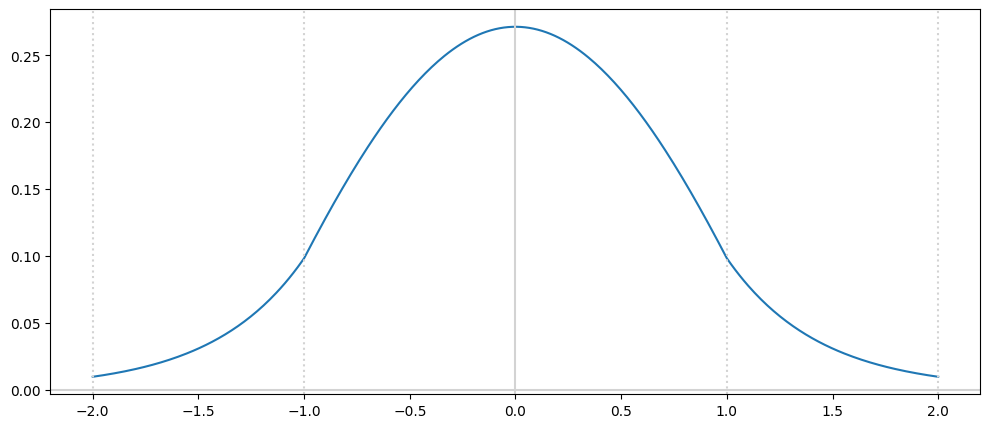

In [8]:
A.plot_field_1d(F1)

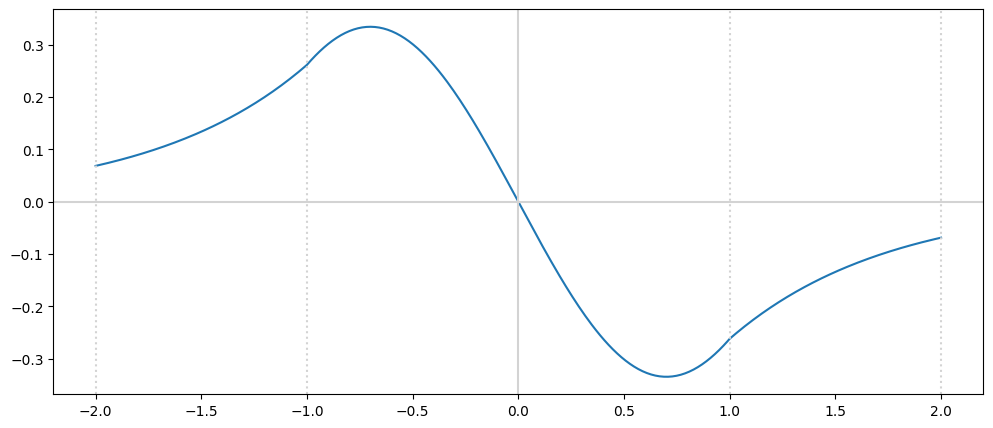

In [9]:
A.plot_field_1d(F2)

## Leaky

In [10]:
field_type = 'TM'
mode_type = 'leaky'
Z_plane=True

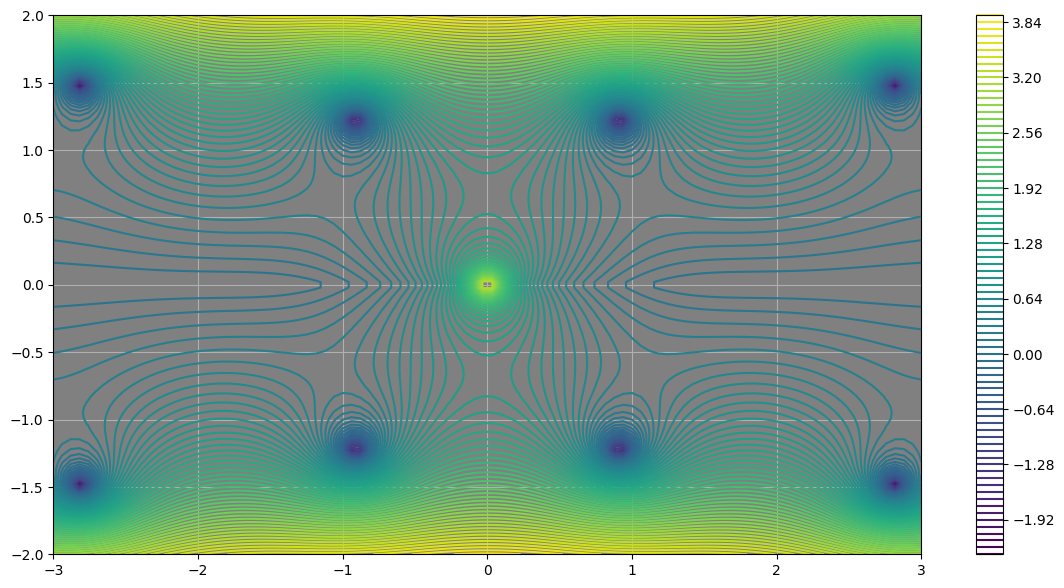

In [11]:
plotlogf(A.determinant, -3, 3, -2, 2, field_type, mode_type, None, Z_plane, iref=100, rref=100,levels=100)

In [12]:
Z3 = newton(A.determinant, np.array(1+1j), args=(field_type, mode_type, None, Z_plane))
Z3

(0.9101832103446515+1.221656436844856j)

In [13]:
F3 = A.fields(Z1, field_type=field_type, mode_type=mode_type, Z_plane=Z_plane)  


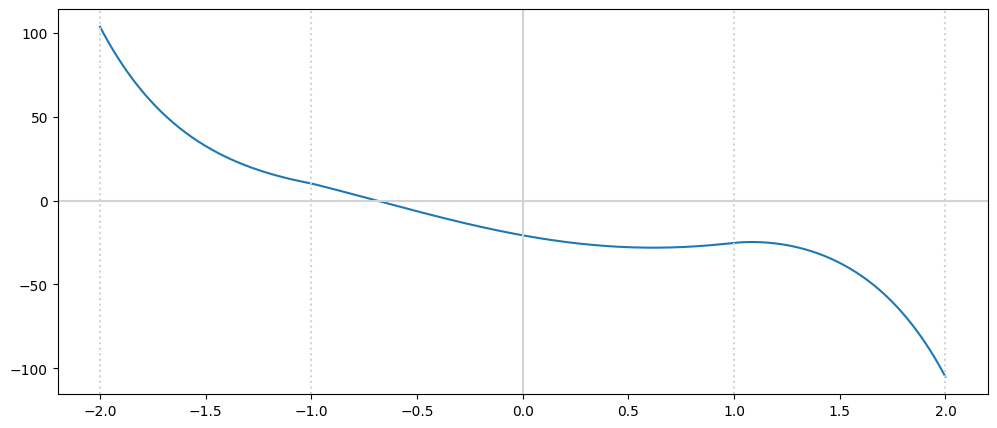

In [14]:
A.plot_field_1d(F3)

## Radiation

In [3]:
field_type = 'TM'
mode_type = 'radiation'
Z_plane=True

In [4]:
# Radiation mode propagation constants in Z_plane are on positive real axis
# Cutoff for propagating radiation modes occurs at Beta=0 (propagating radiation modes have real Z constants less that this value)
evanescent_cutoff = A.Z_from_Beta(0)
Zrad = .9*evanescent_cutoff
Frad = A.fields(Zrad, field_type=field_type, mode_type=mode_type, Z_plane=Z_plane)  

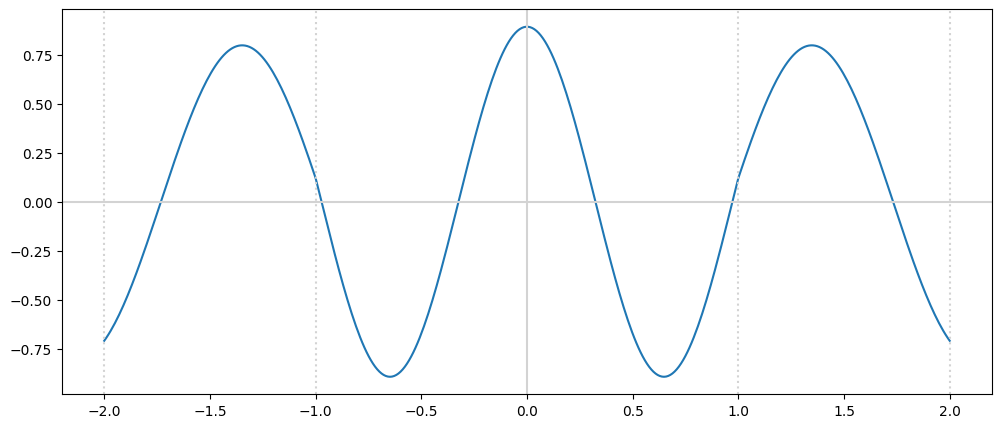

In [5]:
A.plot_field_1d(Frad)

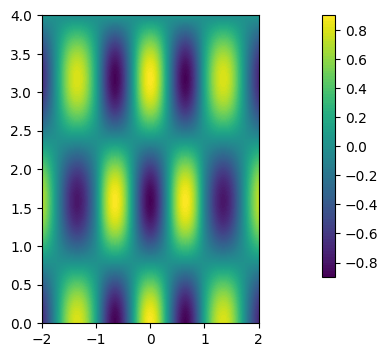

In [18]:
A.plot_field_2d(Frad)

In [19]:
# Radiation mode propagation constants in Z_plane are on positive real axis
# Cutoff for propagating radiation modes occurs at Beta=0 (propagating radiation modes have real Z constants less that this value)
Zrad2 = 1.1*evanescent_cutoff
Frad2 = A.fields(Zrad2, field_type=field_type, mode_type=mode_type, Z_plane=Z_plane)  

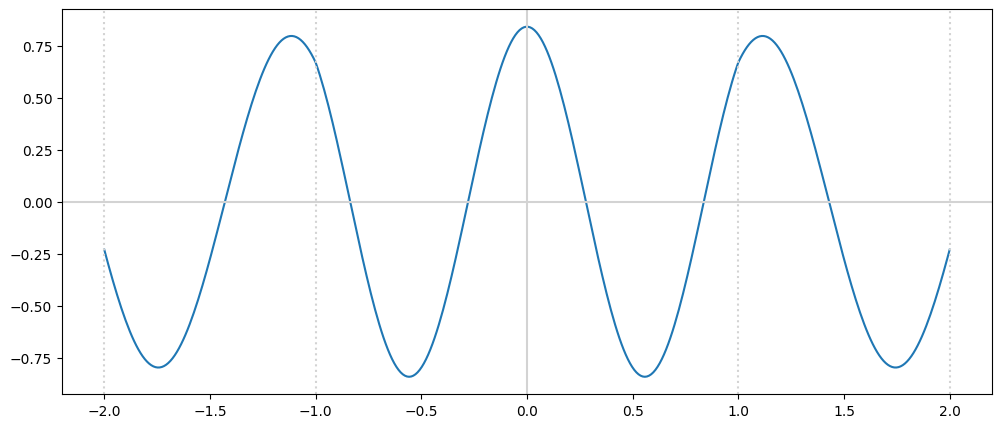

In [20]:
A.plot_field_1d(Frad2)

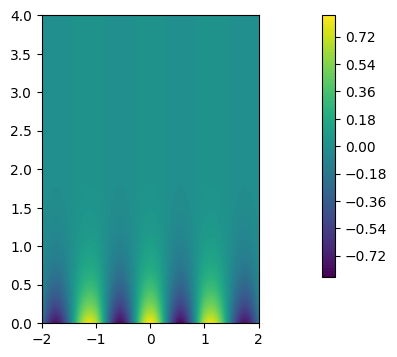

In [21]:
A.plot_field_2d(Frad2)

## Animation in Z plane

Previously the even modes flipped at certain beta values.  Does that happen here?

It appears here the odd ones flip (maybe that was the case before), but not the evens.

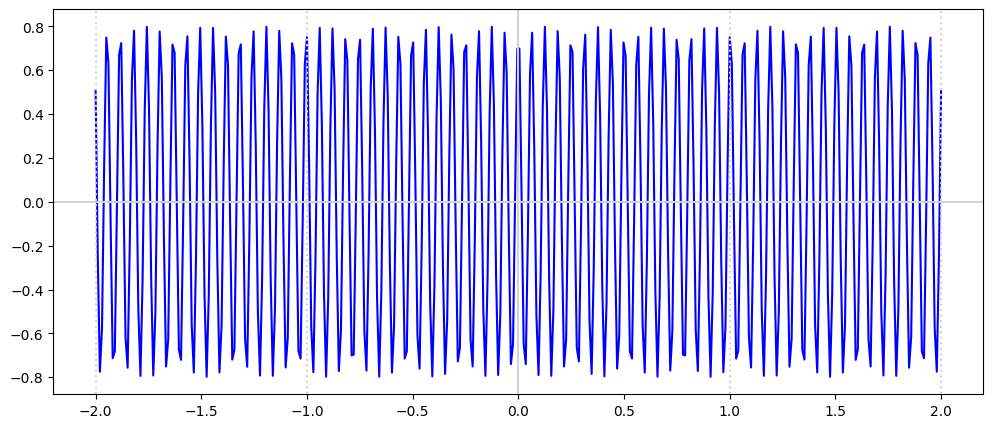

In [19]:
A.radiation_mode_Z_animation('Z_anim', Z_range=[-100, 100], sign='+1')

In [20]:
Video('Z_anim'+'.mp4', html_attributes="controls loop")
